# Business Case: Predicting the price range of the Flight Fare considering the different features given in the data

# Tasks

#### Task 1:-Prepare a complete data analysis report on the given data.
#### Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

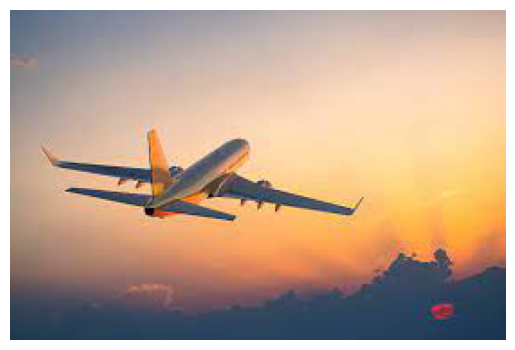

In [3]:
img=plt.imread('flight.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Flight_Fare.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Domain Analysis

 **Airline:**
         So this column will have all the types of airlines like Indigo, Jet Airways,
Air India, and many more.

 **Date_of_Journey:** 
         This column will let us know about the date on which the
passenger’s journey will start.

 **Source:**
         This column holds the name of the place from where the passenger’s
journey will start.

 **Destination:**  
         This column holds the name of the place to where passengers
wanted to travel.

 **Route:**
         Here we can know about what the route is through which passengers
have opted to travel from his/her source to their destination.

 **Dep_Time:** 
         The departure time of the flight from the source airport.
         
 **Arrival_Time:**
         Arrival time is when the passenger will reach his/her destination.
         
 **Duration:**
         Duration is the whole period that a flight will take to complete its
journey from source to destination.

 **Total_Stops:** 
         This will let us know in how many places flights will stop there for
the flight in the whole journey.

 **Additional_Info:** 
         In this column, we will get information about food, kind of food,
and other amenities.

 **Price:**
         Price of the flight for a complete journey including all the expenses
before onboarding.

# Task 1:-Prepare a complete data analysis report on the given data.

# Basic Checks

In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
data.shape

(10683, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [12]:
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
#create new data1 for find unique values
data1=data[['Source','Destination','Airline','Total_Stops','Additional_Info']]

In [15]:
data1.head()

,Source,Destination,Airline,Total_Stops,Additional_Info
0,Banglore,New Delhi,IndiGo,non-stop,No info
1,Kolkata,Banglore,Air India,2 stops,No info
2,Delhi,Cochin,Jet Airways,2 stops,No info
3,Kolkata,Banglore,IndiGo,1 stop,No info
4,Banglore,New Delhi,IndiGo,1 stop,No info


In [16]:
for i in data1:
    print(i,data[i].unique())
    print(data1[i].value_counts())
    print('********')

Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
********
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
********
Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Busine

# EXPLORATORY DATA ANALYSIS


## UNIVARIATE


In [17]:
# Categorical data
data1

,Source,Destination,Airline,Total_Stops,Additional_Info
0,Banglore,New Delhi,IndiGo,non-stop,No info
1,Kolkata,Banglore,Air India,2 stops,No info
2,Delhi,Cochin,Jet Airways,2 stops,No info
3,Kolkata,Banglore,IndiGo,1 stop,No info
4,Banglore,New Delhi,IndiGo,1 stop,No info
...,...,...,...,...,...
10678,Kolkata,Banglore,Air Asia,non-stop,No info
10679,Kolkata,Banglore,Air India,non-stop,No info
10680,Banglore,Delhi,Jet Airways,non-stop,No info
10681,Banglore,New Delhi,Vistara,non-stop,No info


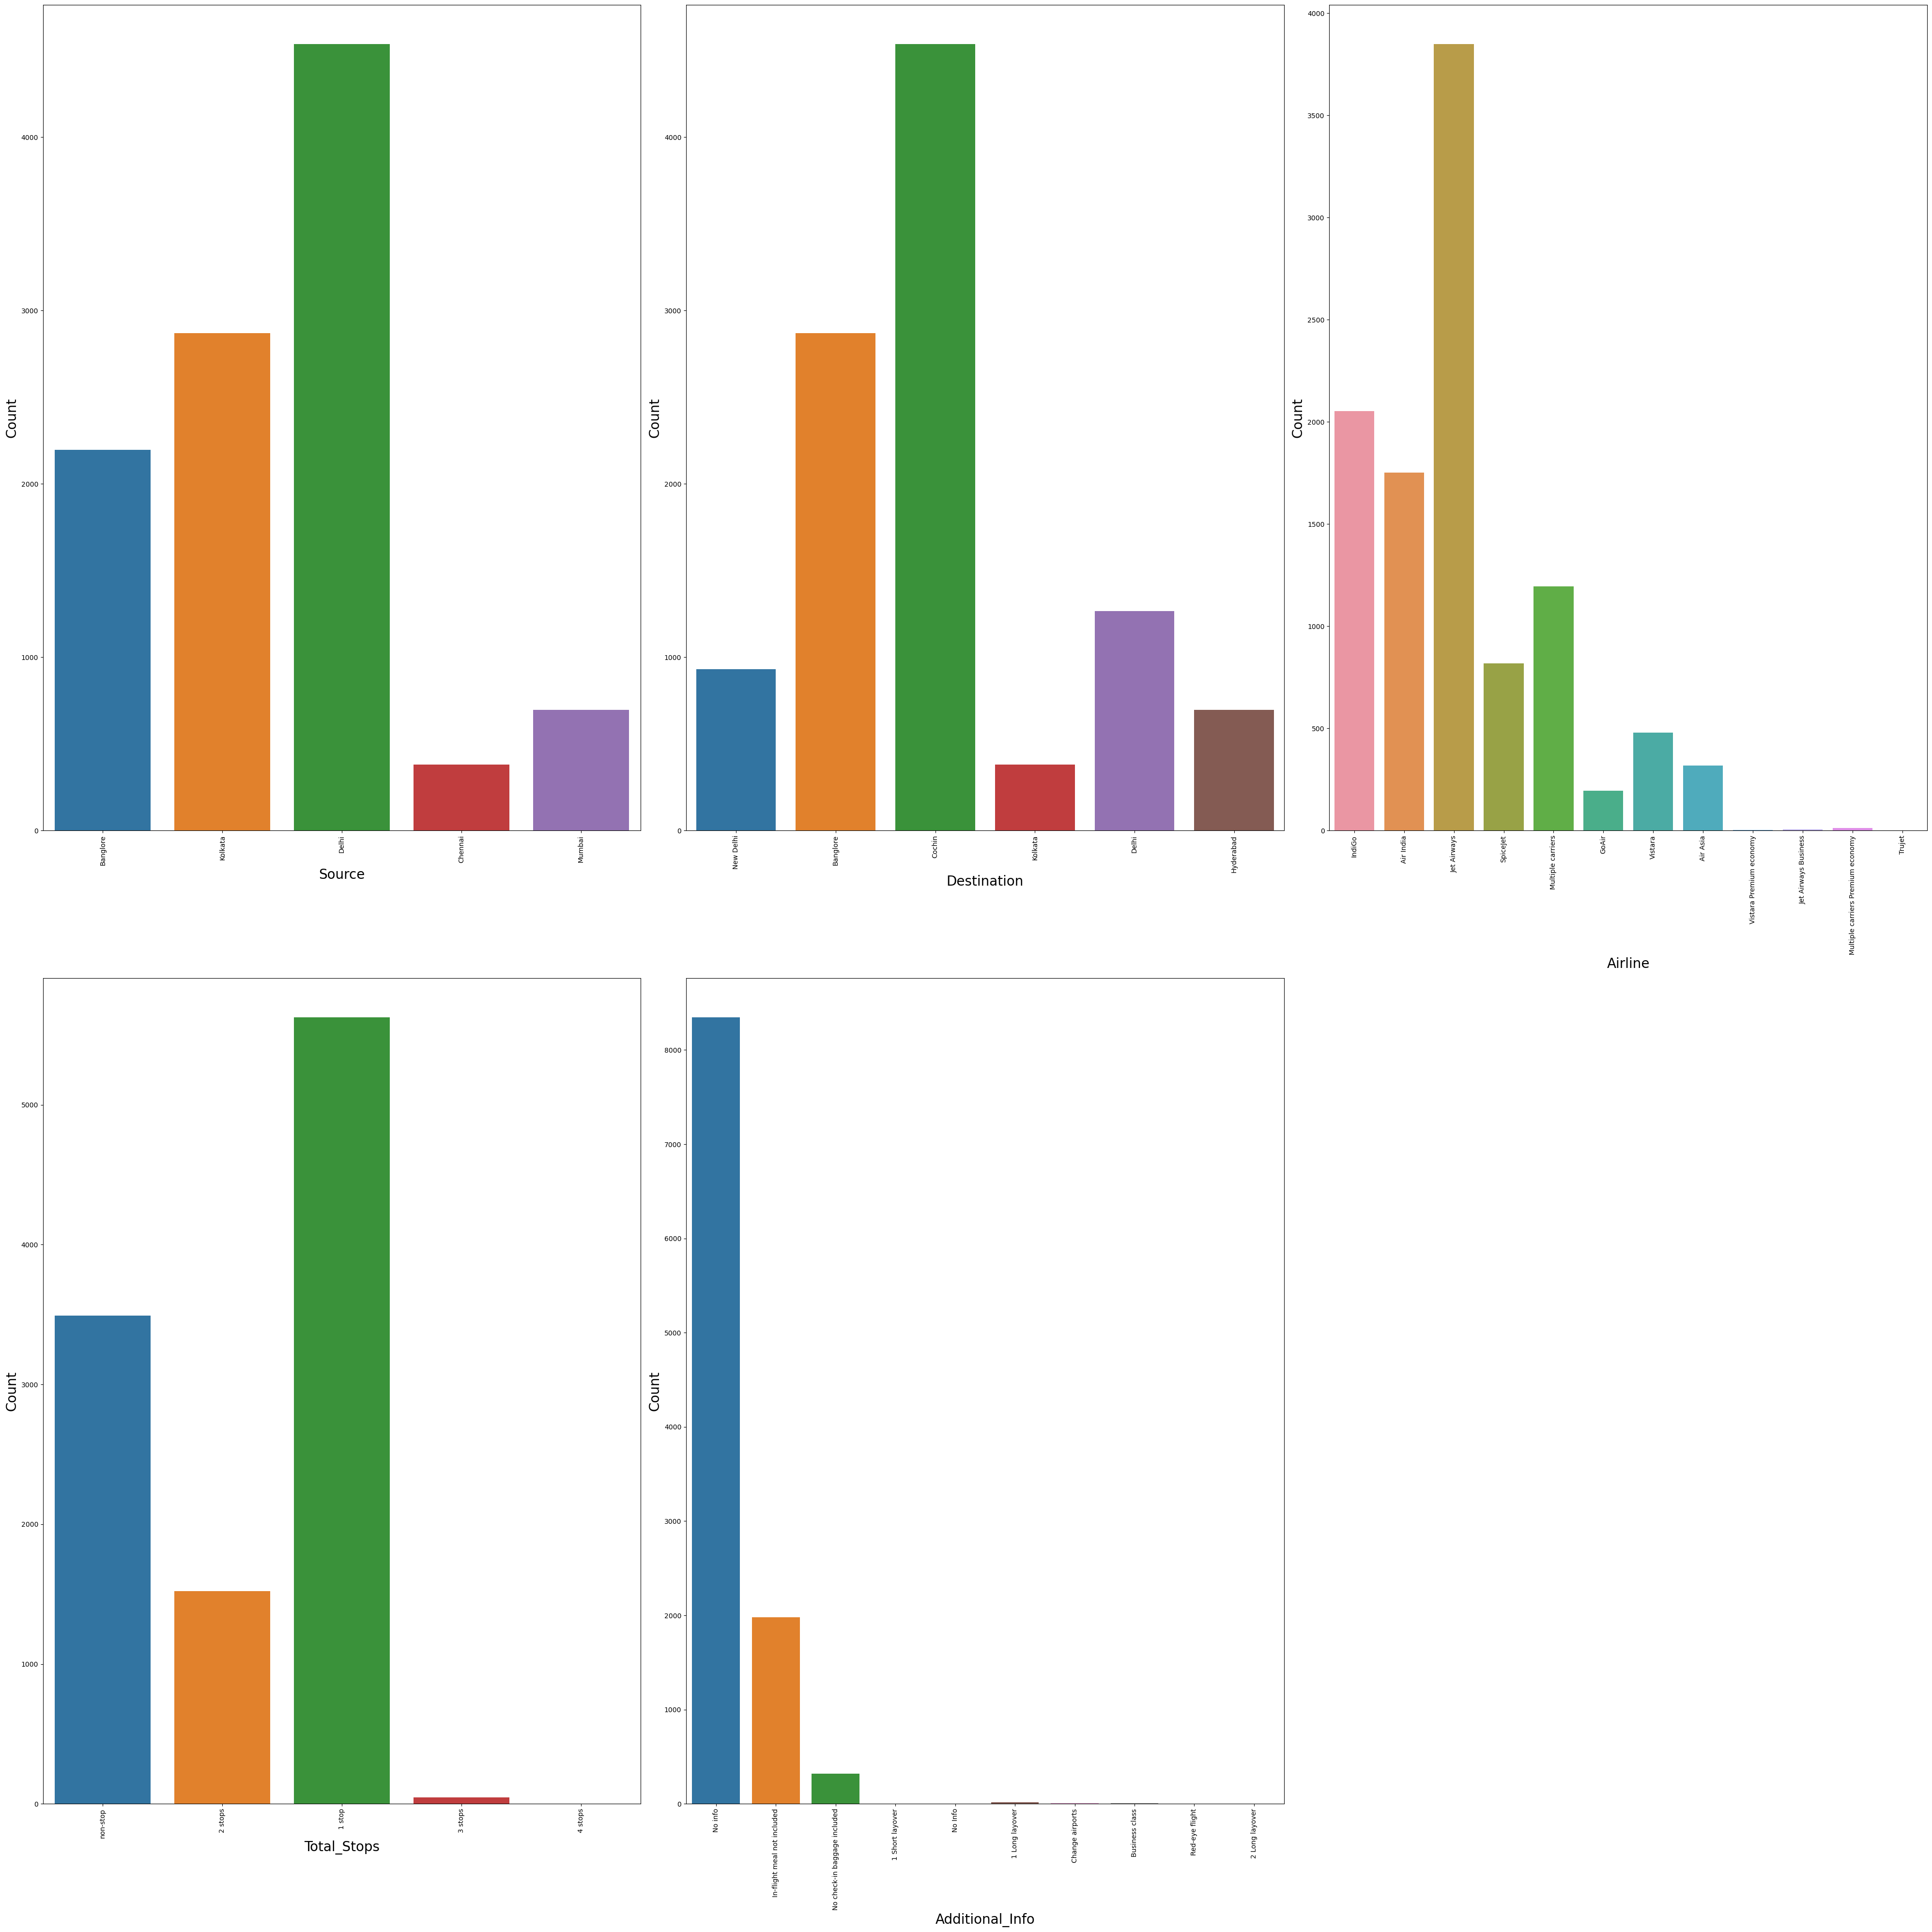

In [18]:
plt.figure(figsize=(40,40))
plotnumber=1

for column in data1:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.countplot(x=data1[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Count",fontsize=20)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

In [19]:
#Numerical Data
num_col=data[['Date_of_Journey','Dep_Time','Arrival_Time','Duration']]

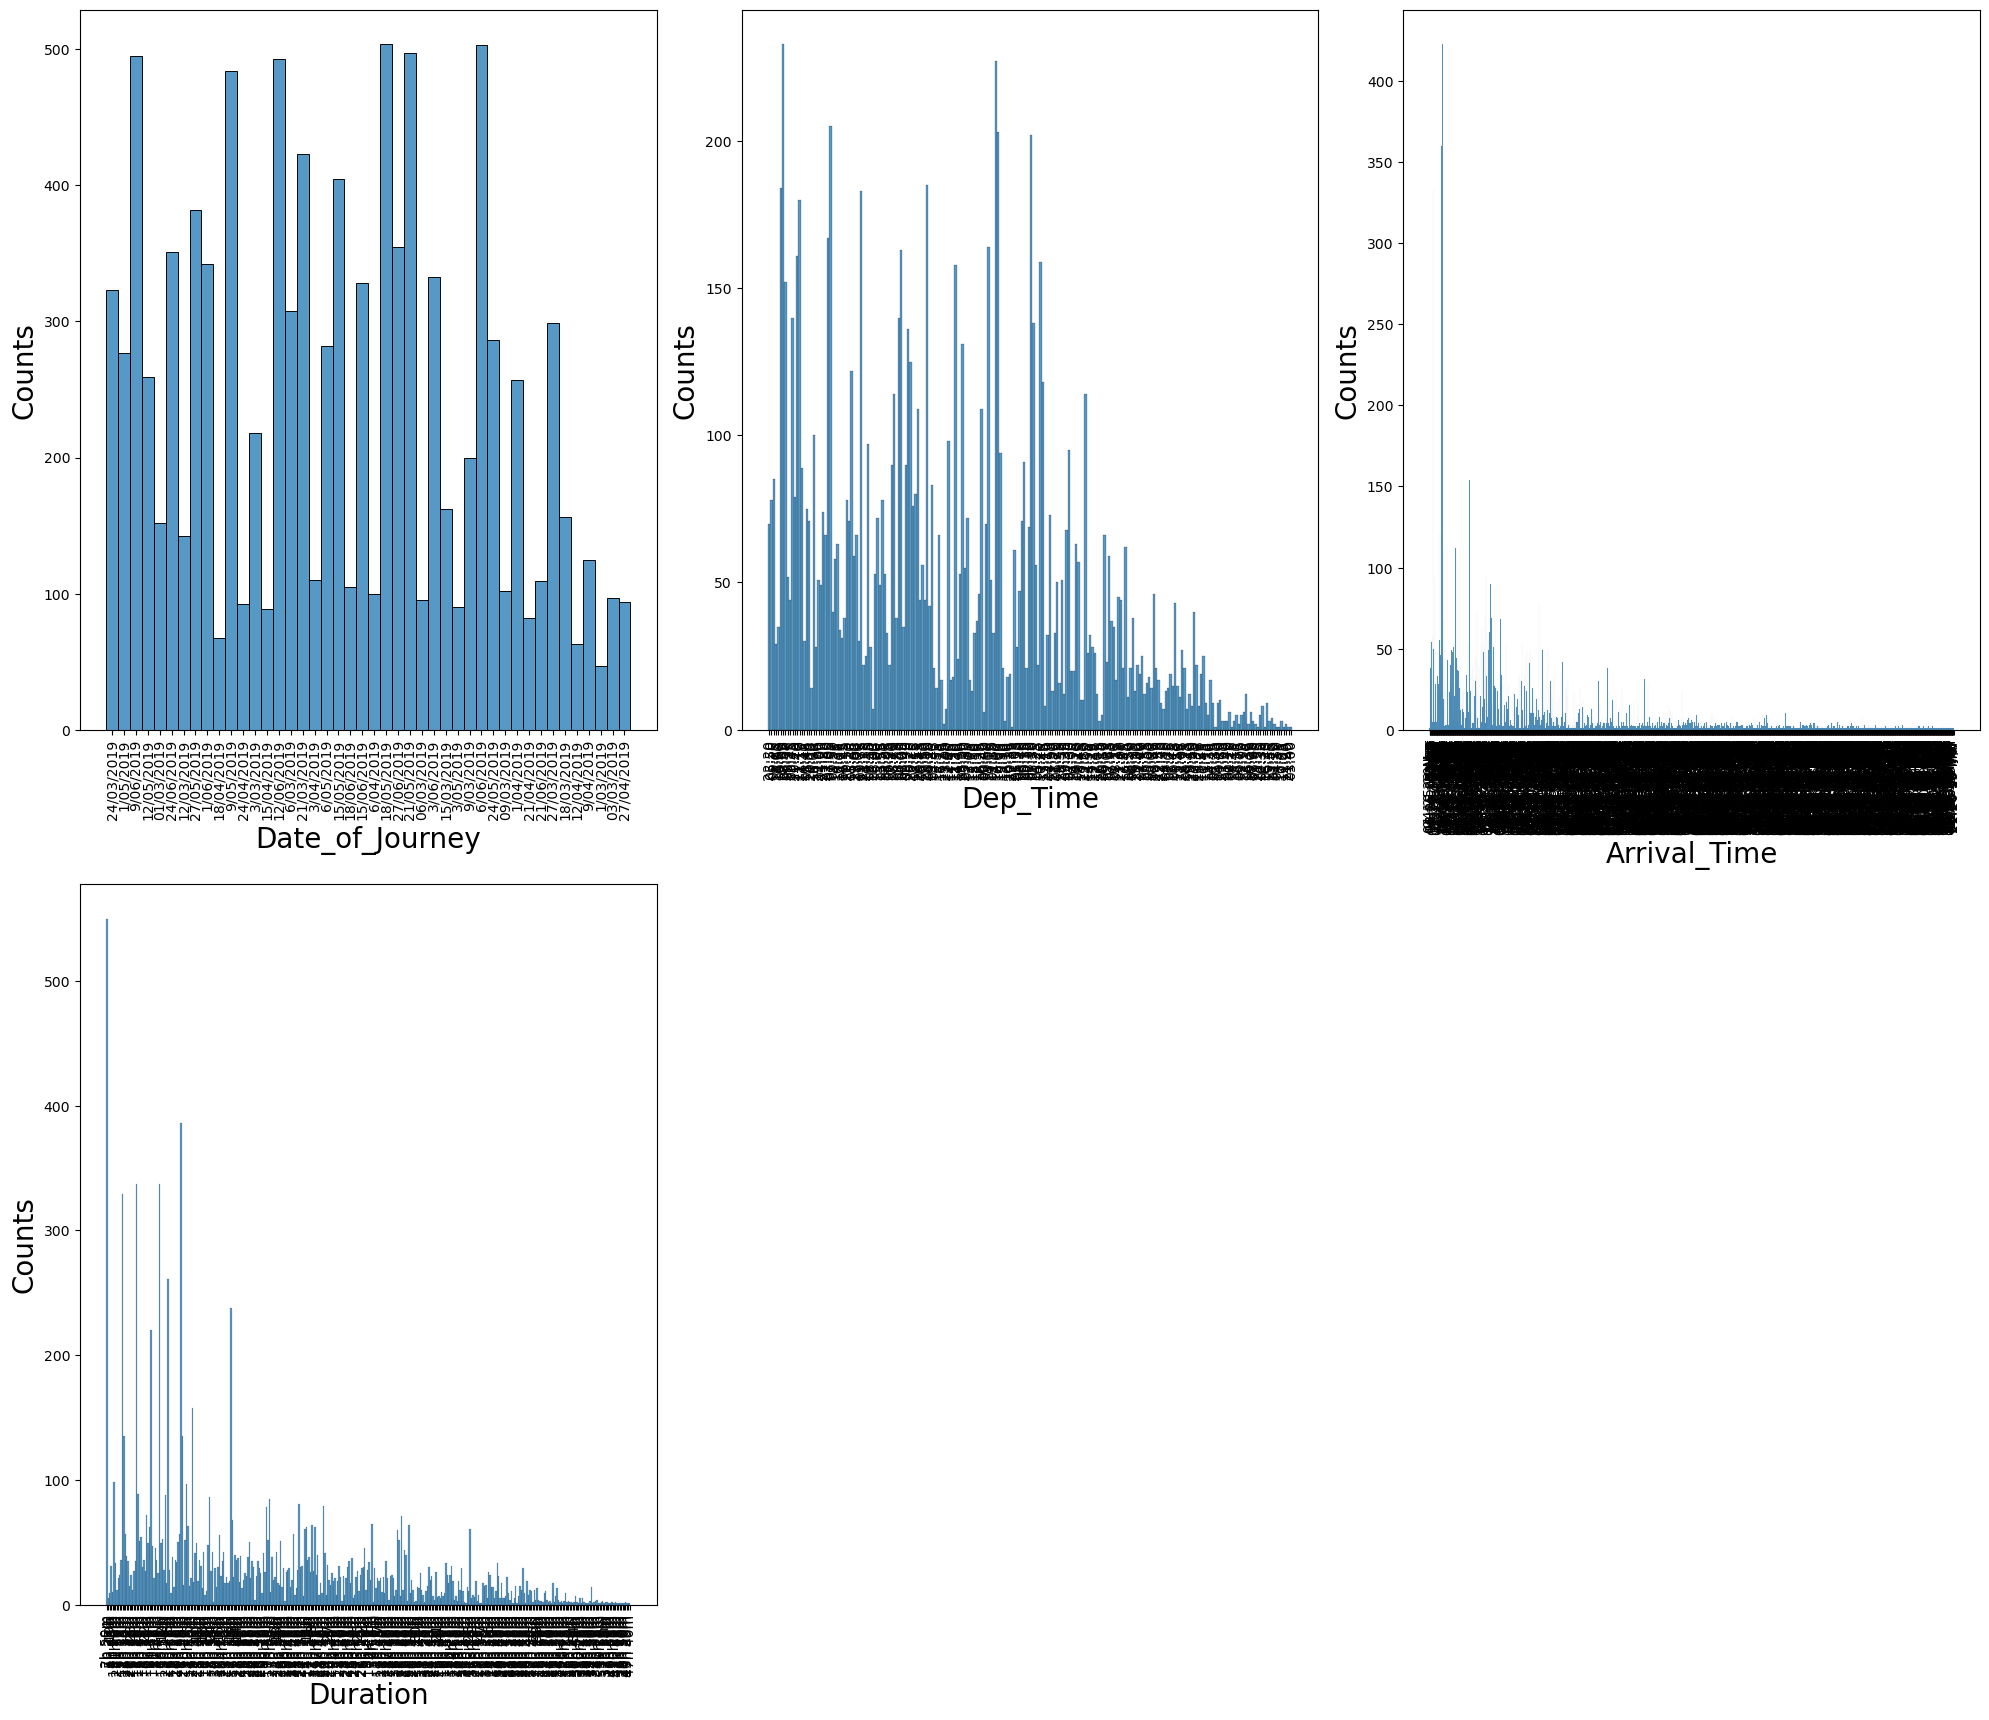

In [20]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Counts', fontsize=20)
        plt.xticks(rotation=90)
    plotnumber += 1
plt.tight_layout()
plt.show()

# Insights

* When visualizing 'Date_of_Journey,' 'Dep_Time,' 'Arrival_Time,' and 'Duration,' it's evident that they overlap significantly, making it challenging to discern clear distributions due to their time-related nature.

# Insights for Airline

* Among all flights everyone is choosing Jet Airways.
* Followed by Jet Airways next highest is Indigo.
* And then third most is Air India.

# Insights for Source

* Most of the flight take off from delhi followed by kolkata and bangalore.

# Insights for Destination

* Most of them most choose their destination to cochin followed by bangalore.

# Insights for Total Stops

* Most flights choose one stop followed by non-stop.

# Insights for Additional_Info

* Maximum flights haven't given any information.
* There are some flights with the information that is in meals not included.

In [3]:
 import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html("Flight.html")

                                             |                                             | [  0%]   00:00 ->…

Report Flight.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Bivariate 

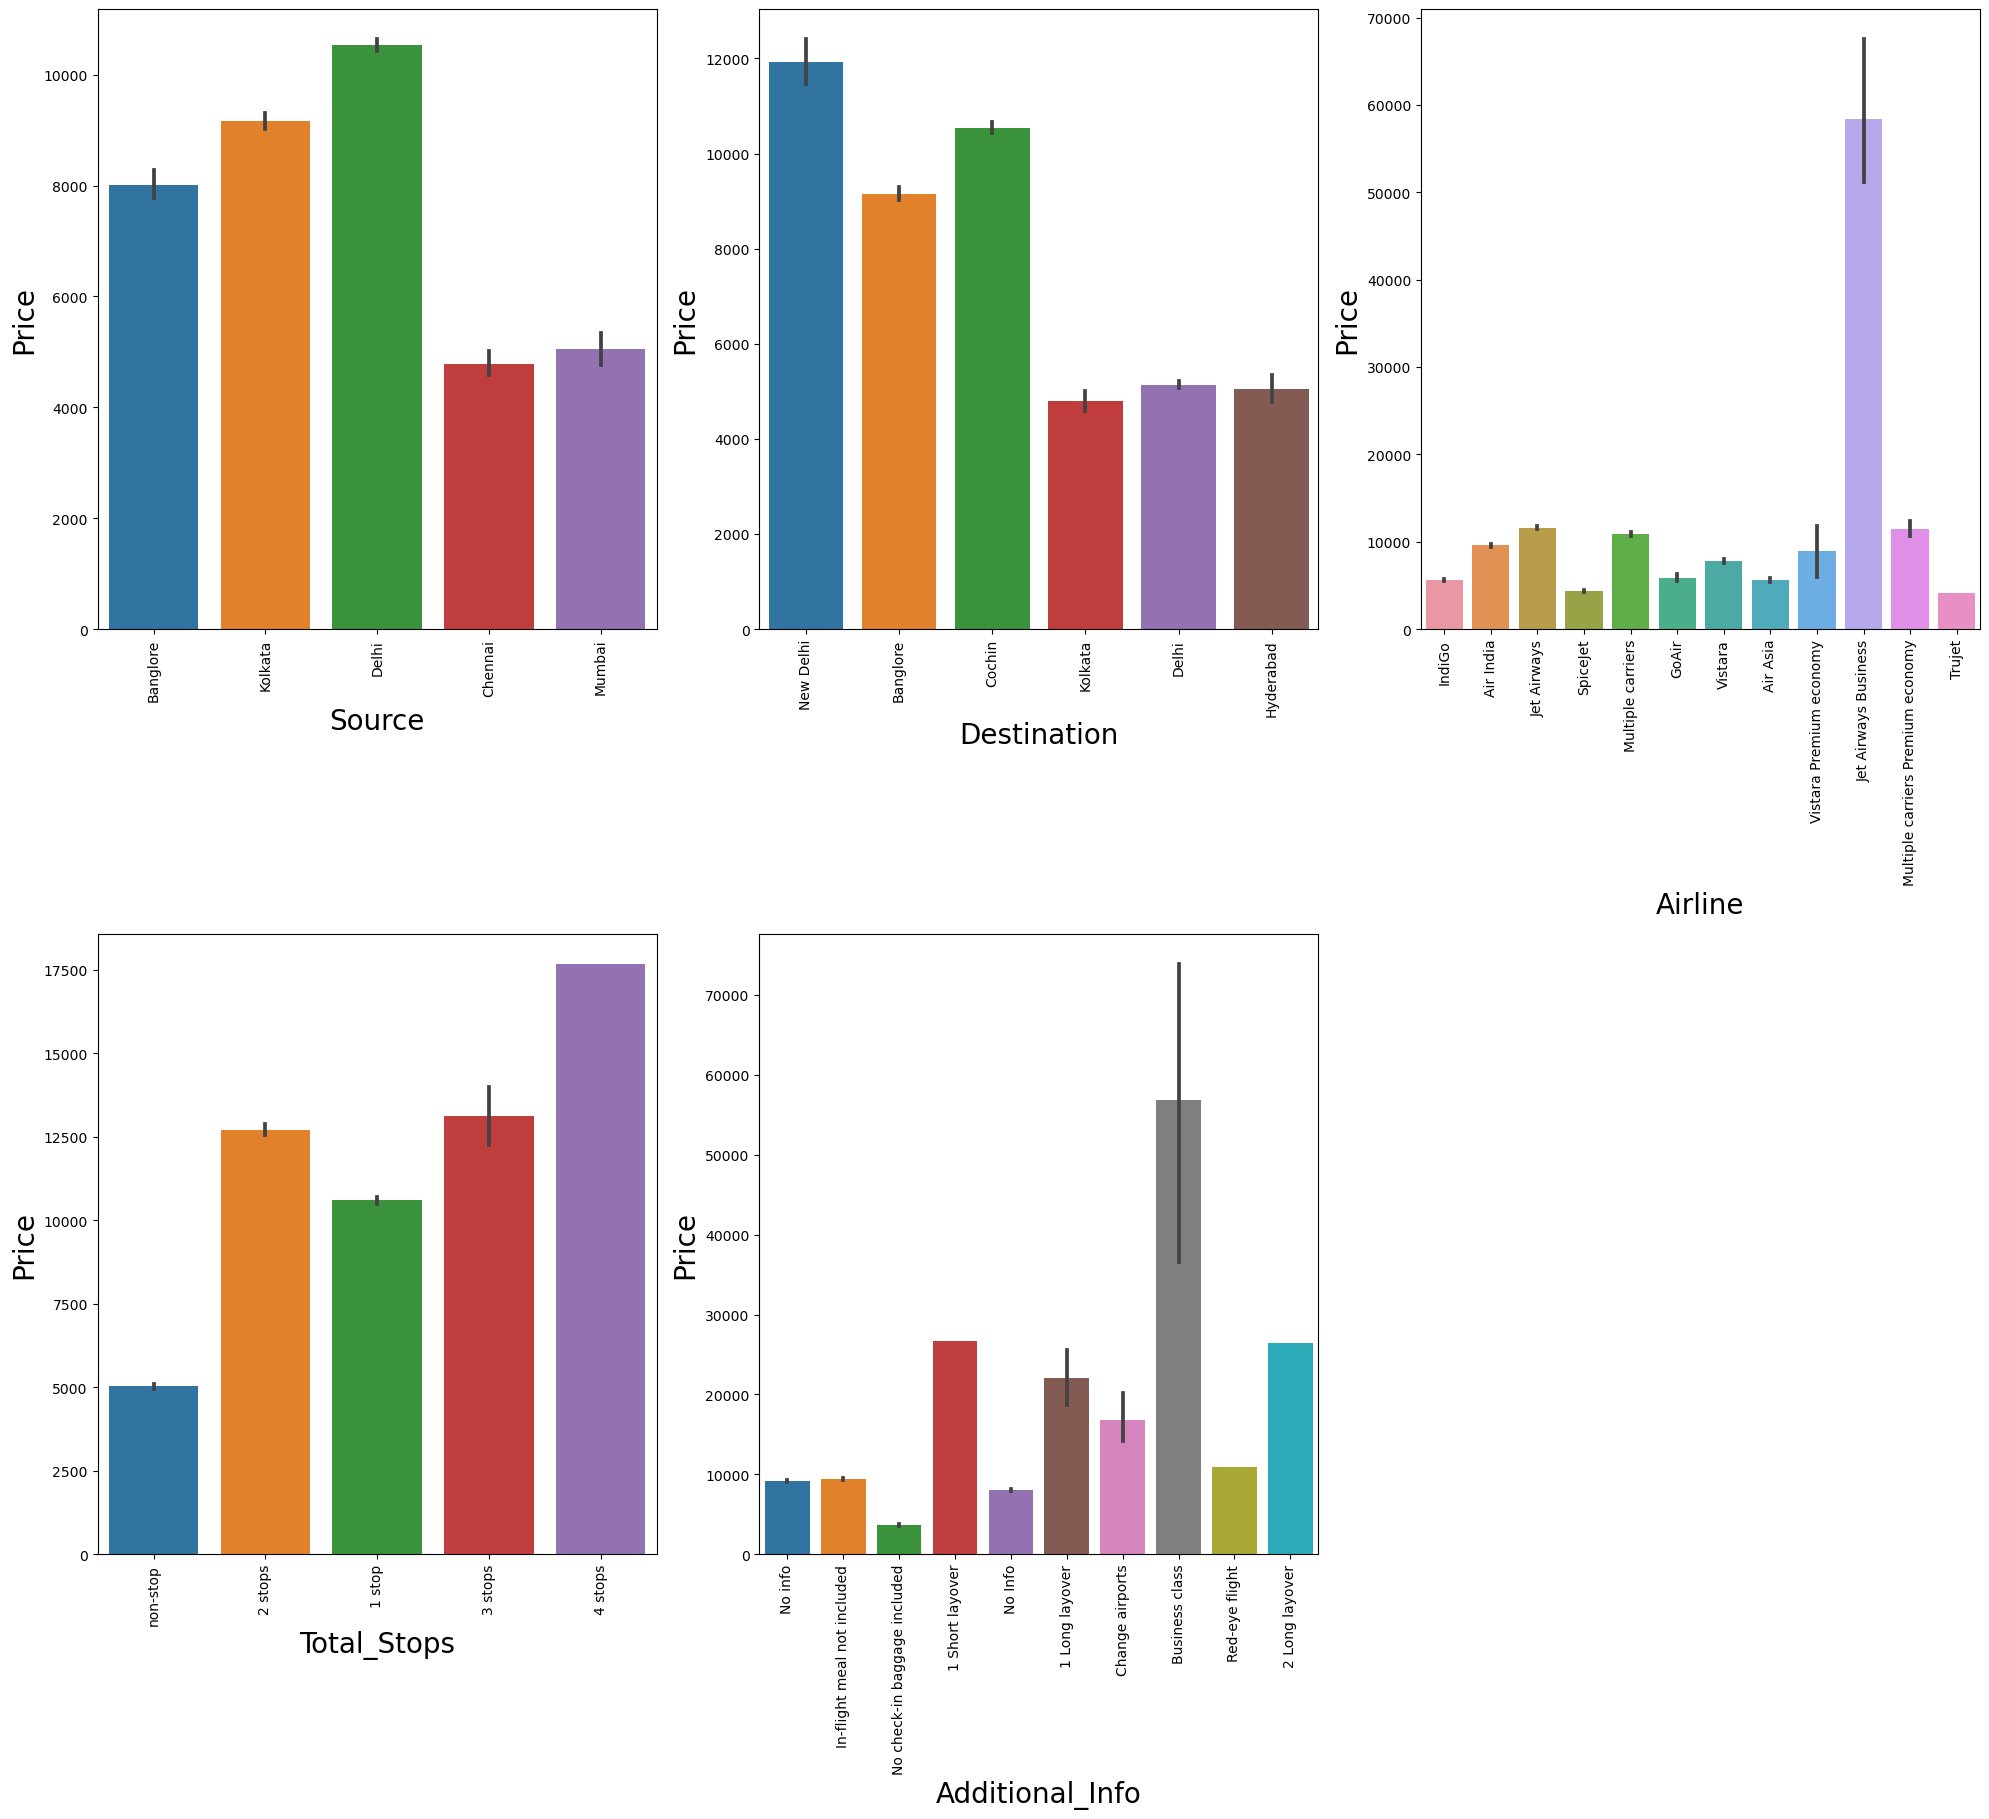

In [21]:
#Bar plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=6:
        ax= plt.subplot(3,3,plotnumber)
        sns.barplot(x=data[column],y=data['Price'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

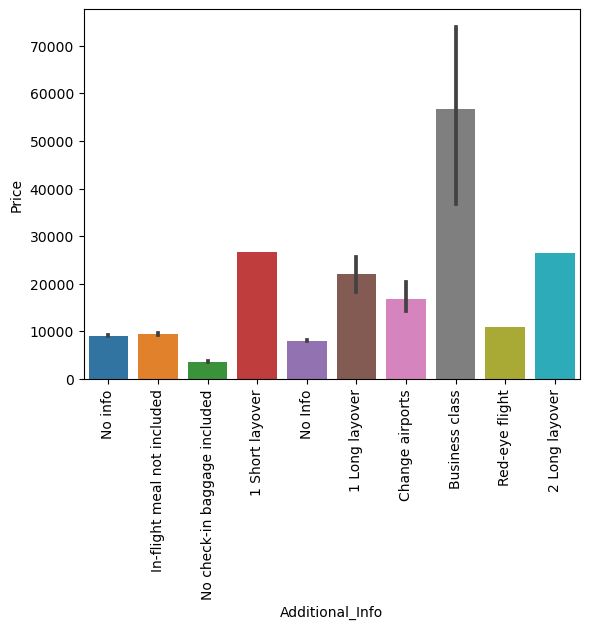

In [22]:
sns.barplot(data=data,x='Additional_Info',y='Price')
plt.xticks(rotation=90)


# Data Preprocessing

In [23]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [24]:
# drop the null values
data.dropna(inplace = True)

In [25]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [26]:
#check for Duplicate value
data.duplicated().sum()

220

* In this specific scenario, involving flight fare prediction based on date, route, and the same location, it is 
advisable to skip the step of handling duplicate data.Retaining duplicates can enhance the accuracy and effectiveness of your flight fare prediction model.

* So we skip the step of handle duplicate 

In [27]:
# hours converted to seconds
data['Duration'] = pd.to_timedelta(data['Duration']).dt.total_seconds()

In [28]:
## seconds converted to mins
data['Duration']=data['Duration']/60

In [29]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170.0,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445.0,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140.0,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325.0,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285.0,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150.0,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155.0,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180.0,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160.0,non-stop,No info,12648


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  float64
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 1001.4+ KB


In [31]:
# change datatype float to int
data['Duration']=data['Duration'].astype(int)

In [32]:
# changing Date of Jounery dtype object to datatime
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  int32         
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 959.7+ KB


In [34]:
# extract the day,month
data["day_of_journey"]=data["Date_of_Journey"].dt.day
data["month_of_journey"]=data["Date_of_Journey"].dt.month

In [35]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,3,1


In [36]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [37]:
# extract hour and min from dep_time
data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"]=pd.to_datetime(data["Dep_Time"]).dt.minute

In [38]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,4,9,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,3,1,11,30


In [39]:
data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [40]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,3,1,11,30,14,10


In [41]:
data.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10682 non-null  int32 
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10682 non-null  object
 7   Price             10682 non-null  int64 
 8   day_of_journey    10682 non-null  int64 
 9   month_of_journey  10682 non-null  int64 
 10  Dep_hour          10682 non-null  int64 
 11  Dep_min           10682 non-null  int64 
 12  Arrival_hour      10682 non-null  int64 
 13  Arrival_min       10682 non-null  int64 
dtypes: int32(1), int64(7), object(6)
memory usage: 1.2+ MB


In [43]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25


In [44]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day_of_journey', 'month_of_journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [45]:
# converting categorical columns into numerical columns using one hot encoding

In [46]:
cat_col=data.select_dtypes(include=["O"])

In [47]:
cat_col

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [48]:
data2=data.copy()

In [49]:
data2.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### * Airlines offer prices within a similar price range. so we use Onehot Encoding

In [50]:
data2.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day_of_journey', 'month_of_journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [51]:
#OneHotEncoding
df1=pd.get_dummies(data2["Airline"],drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(["Airline"],axis=1)

In [52]:
data2.head(3)

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,...,0,0,1,0,0,0,0,0,0,0


In [53]:
df2=pd.get_dummies(data2["Source"],drop_first=True)
data2=pd.concat([data2,df2],axis=1).drop(["Source"],axis=1)


In [54]:
data2.head(2)

,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df3=pd.get_dummies(data2["Destination"],drop_first=True)
data2=pd.concat([data2,df3],axis=1).drop(["Destination"],axis=1)

In [56]:
data2.head(2)

,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0


In [57]:
# manual encoding for Total_stops

In [58]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

<Axes: xlabel='Total_Stops', ylabel='count'>

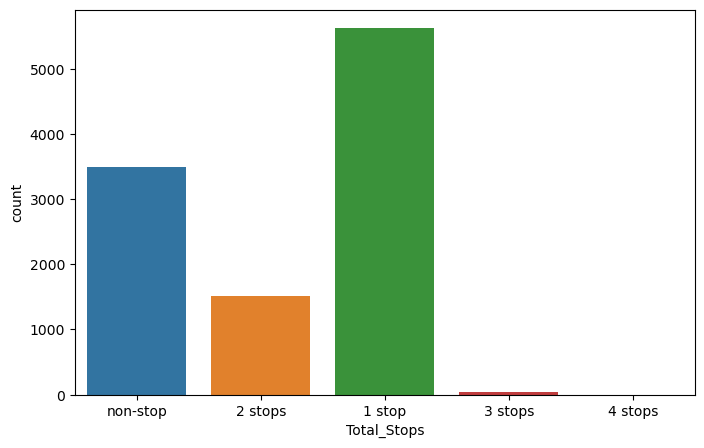

In [59]:
 plt.figure(figsize=(8,5))
sns.countplot(data=data,x="Total_Stops")


In [60]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [61]:
data2.Total_Stops=data2.Total_Stops.map({'non-stop':3,'2 stops':2,'1 stop':4,'3 stops':1,'4 stops':0})

In [62]:
data2.tail()

,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
10678,CCU → BLR,150,3,No info,4107,4,9,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,155,3,No info,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,180,3,No info,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,160,3,No info,12648,3,1,11,30,14,...,0,0,0,0,0,0,0,0,0,1
10682,DEL → GOI → BOM → COK,500,2,No info,11753,5,9,10,55,19,...,0,0,1,0,0,1,0,0,0,0


# Feature Engineering

In [63]:
# drop the Additional info column because  no_info values most rows no use 
# drop the Route because already cover all the data from other columns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

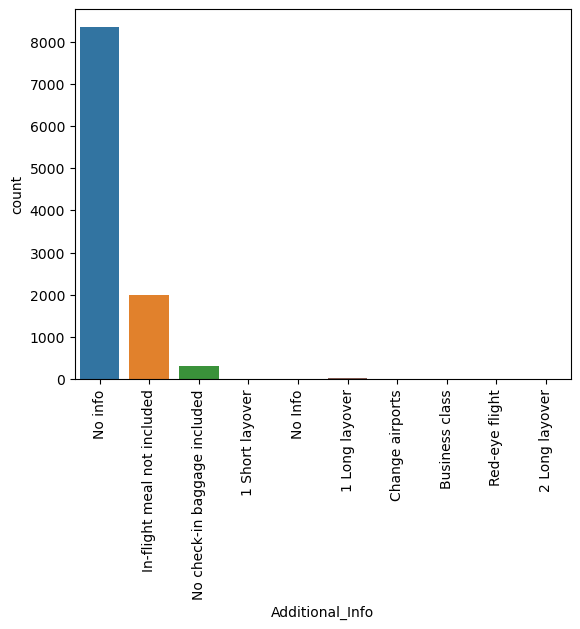

In [64]:
sns.countplot(x=data['Additional_Info'])
plt.xticks(rotation=90)

In [65]:
#Dropping additional_info and Route.
data2.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [66]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day_of_journey', 'month_of_journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [67]:
data2.columns

Index(['Duration', 'Total_Stops', 'Price', 'day_of_journey',
       'month_of_journey', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [68]:
Corr_data=data2[['day_of_journey','month_of_journey','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration']]

In [69]:
Corr_data.corr()

,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration
day_of_journey,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.038360
month_of_journey,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055136
Dep_hour,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002088
Dep_min,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.019099
Arrival_hour,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.051531
Arrival_min,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.069663
Duration,-0.038360,0.055136,0.002088,-0.019099,0.051531,-0.069663,1.000000


<Axes: >

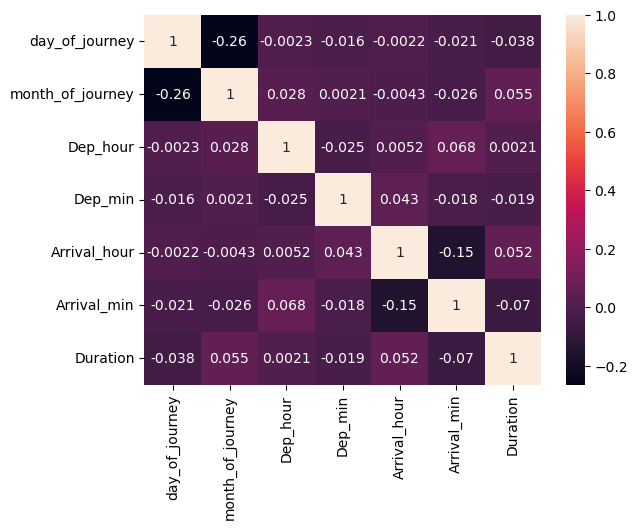

In [70]:
sns.heatmap(Corr_data.corr(),annot=True)

# Insights
* If we have a high correlation between independent variables, we should drop the column.
* But in our data we have a high correlation between independent and dependent variables, 
  so we don't need to drop anything.

# Data Analysis

### Summary

     * The dataset contains 10,683 records with features including Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, and Additional_Info, which provide information about travel journeys.

     * Jet Airways is the most frequently occurring airline with 3,849 instances, followed by IndiGo with 2,053 instances, indicating their prevalence.

     * The dataset consists of Date_of_Journey with 12 unique dates, Source with 5unique sources, Destination with 5 unique destinations, Route with 6 unique routes, Dep_Time with 128 unique departure times, Arrival_Time with 222 unique arrival times, Duration with 1,343 unique durations, and Total_Stops with 5 unique values, along with Additional_Info containing 10 unique additional information categories.

     * Delhi is the most frequently chosen departure city in the flight prediction dataset, with 4,537 occurrences.

     * Kolkata follows as the second most common departure city, appearing 2,871 times.

     * Bangalore is also a popular starting point for flights, with 2,197 instances.

     * "1 stop" flights are the most prevalent in the dataset, with 5,625 occurrences.

     * "Non-stop" flights are the second most common, appearing 3,491 times.

     * "No info" is the most common additional information in the dataset, with 8,345 occurrences.

     * "In-flight meal not included" is the second most frequent, appearing 1,982 times.

     * When visualizing 'Date_of_Journey,' 'Dep_Time,' 'Arrival_Time,' and 'Duration,' it's evident that they overlap significantly, making it challenging to discern clear distributions due to their time-related nature.
  
     * The prices for Jet Airways Business appear significantly higher in comparison to other options.

     * Delhi appears to have a higher price range compared to other airports.

     * Data for flights with 4 stops is limited, and it typically indicates long-distance journeys, which tend to be more costly.

    * Business class tickets have a significantly higher price range compared to other fare classes. 

    * There is no correaltion Between features.

## Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

## Split the data into train and test

In [172]:
df=data2

In [173]:
df.head()

,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,3,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,5,1,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,6,9,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,4,6218,5,12,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,4,13302,3,1,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [176]:
x= df.drop('Price',axis=1)
y=df["Price"]

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [178]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 28)
(2137, 28)
(8545,)
(2137,)


# Model Creation

## LINEAR REGRESSION

In [75]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Model Evaluation

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

9138982.375099318
2157.155928913112


In [77]:
rmse=np.sqrt(mse)

In [78]:
rmse

3023.0749866814945

In [79]:
r2=r2_score(y_test,y_pred)
r2

0.5761544150657629

In [80]:
adjusted_r2_score=1-((1-0.5761544150657629)*(2137-1))/(2137-28-1)
adjusted_r2_score

0.5705245875618925

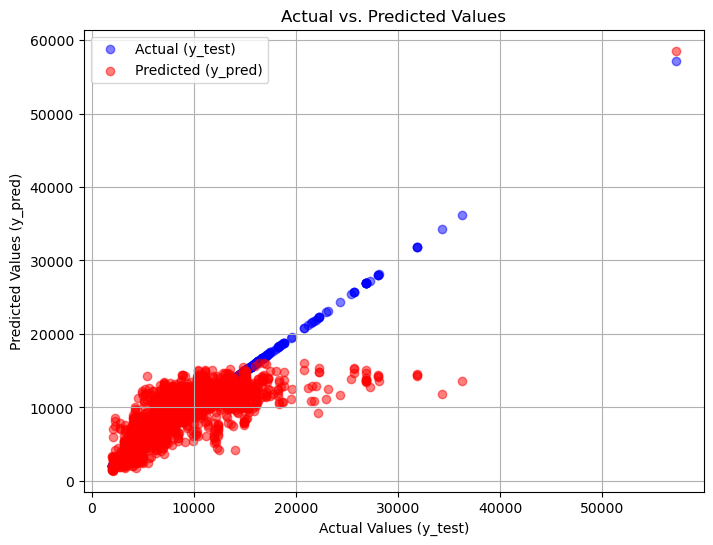

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


# KNN

In [82]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred1=KNN.predict(x_test)
y_pred1

array([16315. ,  5158.2,  8441.6, ...,  6471.8,  9573.4, 11467.6])

In [83]:
(y_test != y_pred1).sum()

2110

In [84]:
len(y_test)

2137

In [85]:
(y_test != y_pred1).sum()/len(y_test)

0.9873654656059897

In [86]:
ERROR_RATE = []

for i in range(1, 13):
    KNN = KNeighborsRegressor(i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    error_rate = (y_test != y_pred1).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [87]:
ERROR_RATE

[0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897,
 0.9873654656059897]

# Model Evaluation

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [89]:
mse=mean_squared_error(y_test,y_pred1)
mse

10207736.729171734

In [90]:
mae=mean_absolute_error(y_test,y_pred1)
print("mae",mae)


mae 1926.1969115582592


In [91]:
KNR_r2=r2_score(y_test,y_pred1)
KNR_r2


0.5265879758539886

In [92]:
x_test.shape

(2137, 28)

In [93]:

adjusted_r2_score=1-(1-KNR_r2)*(2137-1)/(2137-28-1)
adjusted_r2_score

0.5202997705996772

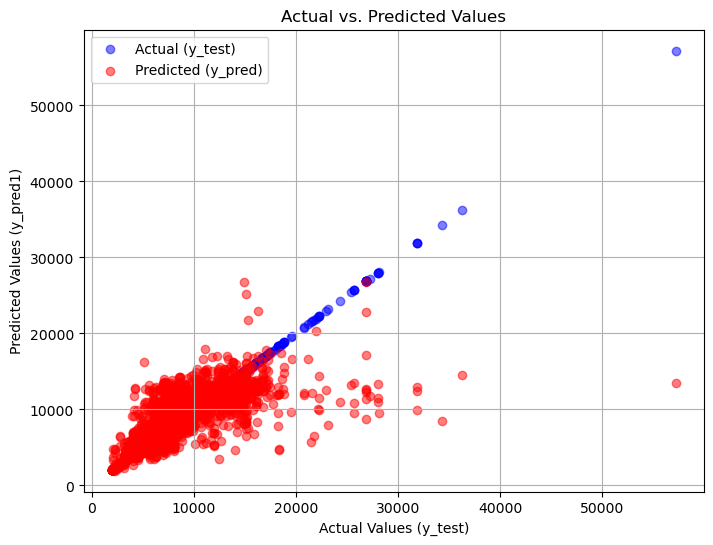

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred1, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred1)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


# SUPPORT VECTOR REGRESSOR

In [95]:
from sklearn.svm import SVR
model = SVR() 
model.fit(x_train, y_train)

SVR()

In [96]:
y_pred2=model.predict(x_test)

# Model evaluation

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [98]:
mse=mean_squared_error(y_test,y_pred2)
mse

18210240.255990822

In [99]:
mae=mean_absolute_error(y_test,y_pred2)
mae

3082.315770408965

In [100]:
SVR_r2=r2_score(y_test,y_pred2)
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [101]:
adj_r2=1-(1-0.15544974086794405)*(2137-1)/(2137-28-1)
adj_r2

0.14423180573715777

# Cross Validation

In [125]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(model, x, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", scores)
print("Mean R2 Score:", scores.mean())
print("Standard Deviation of R2 Score:", scores.std())


Cross-validation R2 scores: [0.1481488  0.14529044 0.164505   0.17083266 0.15646657]
Mean R2 Score: 0.157048692986767
Standard Deviation of R2 Score: 0.009627023064763695


###  HyperParameter Tuning for SVM

In [126]:
#We use GridSearch CV
from sklearn.model_selection import RandomizedSearchCV
#defining Hyperparameter 
param_grid={'C':[0.001,0.01,0.1,2,5,6,70,80],'kernel':['linear'],'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]}
model=SVR()
grid=RandomizedSearchCV(model,param_grid,verbose=2,scoring='r2',cv=5)
grid.fit(x,y)
print(grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   7.5s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   7.5s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   7.3s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   7.7s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   7.2s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   6.5s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   6.2s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   6.6s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   6.4s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   6.5s
[CV] END .................C=0.01, epsilon=0.2, kernel=linear; total time=   7.4s
[CV] END .................C=0.01, epsilon=0.2, k

In [103]:
svr=SVR(kernel='linear',epsilon=0.5,C=80)
svr.fit(x_train,y_train)
y_pred3=svr.predict(x_test)

In [104]:
y_pred3

array([10370.29091752,  7043.50453127,  7758.08148564, ...,
        7753.03181208, 10918.05584444,  9861.93583603])

# Model Evalution

In [105]:
#MSE
MSE=mean_squared_error(y_test,y_pred3)
MSE

11145633.301285412

In [106]:
#MAE
MAE=mean_absolute_error(y_test,y_pred3)
MAE

2108.330600902892

In [107]:
#RMSE
rmse=np.sqrt(MSE)
rmse

3338.507645833002

In [108]:
#R2_Score
SVRh_r2=r2_score(y_test,y_pred3)
SVRh_r2

0.4830904282169065

In [109]:
# Adjust R2_score
adj_r2=1-(1-SVRh_r2)*(3205-1)/(3205-28-1)
adj_r2

0.47853329093418406

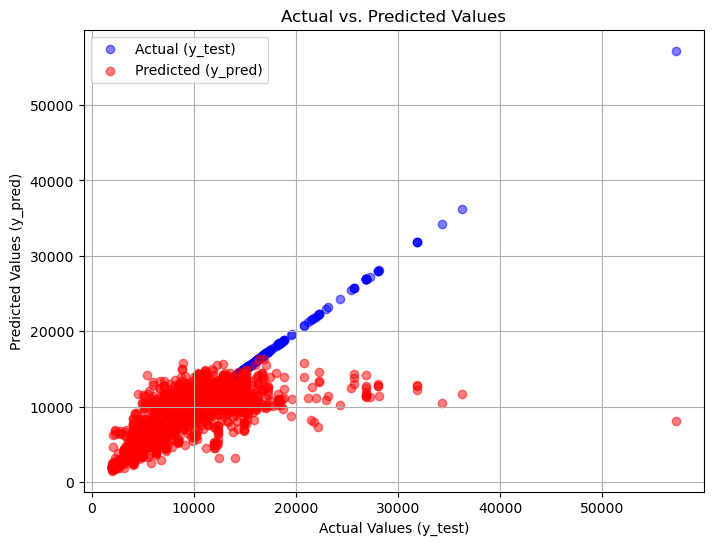

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred3, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# DECISION TREE

In [111]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

y_pred4=model.predict(x_test)

# Model Evaluation

In [112]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [113]:
mse=mean_squared_error(y_test,y_pred4)
mse

4915230.833641267

In [114]:
mae=mean_absolute_error(y_test,y_pred4)
mae

1323.0515910154422

In [115]:
r2_score=r2_score(y_test,y_pred4)
r2_score

0.7720425751725076

In [116]:
adj_r2=1-(1-0.7593694860137628)*(2137-1)/(2137-28-1)
adj_r2

0.7561732552777026

# Hyperparameter tuning

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None]  
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(x, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=

[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4,

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_spl

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5

[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split

In [117]:
model=DecisionTreeRegressor(max_depth= 10,max_features='auto',min_samples_leaf=2,min_samples_split=5)
model.fit(x_train,y_train)
y_pred5=model.predict(x_test)

In [118]:
y_pred5

array([17062.25      ,  5596.31914894,  8559.82258065, ...,
        6721.34117647, 12194.09803922, 11931.47906977])

# Model Evalution

In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [120]:
mse=mean_squared_error(y_test,y_pred5)
mse

5085281.654953778

In [121]:
mae=mean_absolute_error(y_test,y_pred5)
mae

1346.559195468578

In [122]:
DT_r2_score=r2_score(y_test,y_pred5)
DT_r2_score

0.7641559979947105

In [123]:
adj_r2=1-(1-DT_r2_score)*(2137-1)/(2137-28-1)
adj_r2

0.7610233452166516

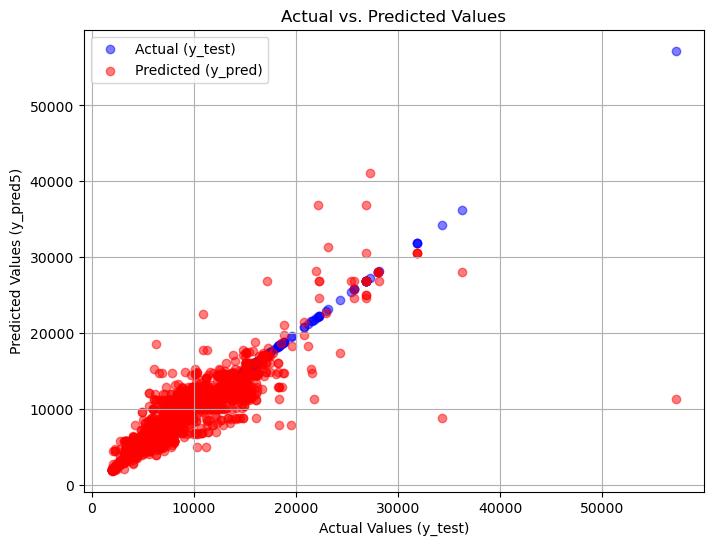

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred5, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred5)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# RANDOM FOREST

In [125]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

y_pred6=model.predict(x_test)


# Model evaluation

In [137]:
 from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [127]:
mse=mean_squared_error(y_test,y_pred6)
mse

4037755.3564724517

In [128]:
mae=mean_absolute_error(y_test,y_pred6)
mae

1186.8230357637474

In [129]:
r2_score=r2_score(y_test,y_pred6)
r2_score

0.8127379274142854

In [130]:
adj_r2=1-(1-r2_score)*(2137-1)/(2137-28-1)
adj_r2

0.8102505754065055

# Hyperparameter tuning

In [159]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [160]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
model_ht=RandomForestRegressor(random_state=42)
model_cv = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=1, 
                            random_state=42, n_jobs=-1, scoring='r2')
model_cv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

rf_best_params=model_cv.best_params_
print(f"best_params:{rf_best_params}")

In [132]:
rfr1=RandomForestRegressor(n_estimators=600,max_features='sqrt',max_depth=37,min_samples_split=10,
                           min_samples_leaf=1,random_state=42,bootstrap=False)
rfr1.fit(x_train,y_train)
y_pred=rfr1.predict(x_test)

In [133]:
#MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

3398149.968908117

In [134]:
#MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

1190.3338465085433

In [135]:
#RMSE
rmse=np.sqrt(MSE)
rmse

1843.4071630836518

In [138]:
 
# R2_Score
RFR_r2_score=r2_score(y_test,y_pred)
RFR_r2_score

0.8424013963315617

In [139]:
y_test.dtype

dtype('int64')

In [140]:
y_pred.dtype

dtype('float64')

In [141]:
adj_r2=1-(1-RFR_r2_score)*(2137-1)/(2137-28-1)
adj_r2

0.8403080562448841

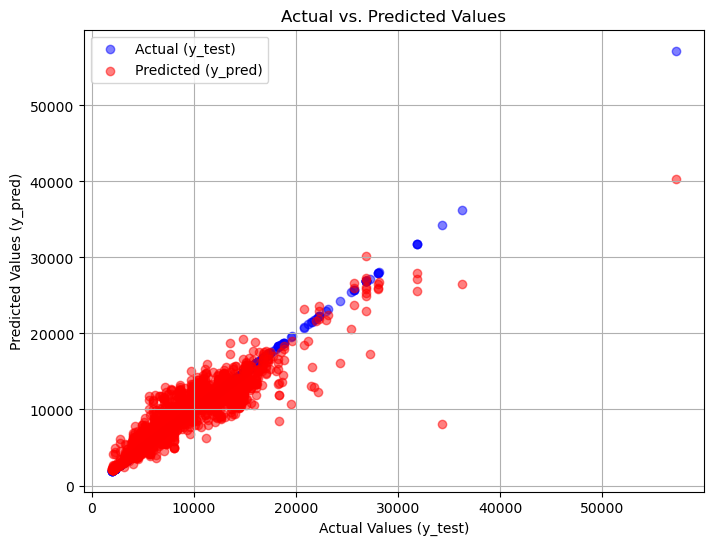

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_predgb=gbr.predict(x_test)

In [145]:
y_predgb

array([15517.74609445,  7768.93260983,  9496.78782786, ...,
        7580.32996005, 11365.9434642 , 11979.52617444])

# Model Evalution

In [146]:
#MSE
MSE=mean_squared_error(y_test,y_predgb)
MSE

4422507.345279874

In [147]:
#MAE
MAE=mean_absolute_error(y_test,y_predgb)
MAE

1484.6177859165073

In [148]:
#RMSE
rmse=np.sqrt(MSE)
rmse

2102.9758308834353

In [149]:
#R2_Score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predgb)
r2_score

0.7948939897571761

In [150]:
adj_r2=1-(1-r2_score)*(2137-1)/(2137-28-1)
adj_r2

0.7921696214996813

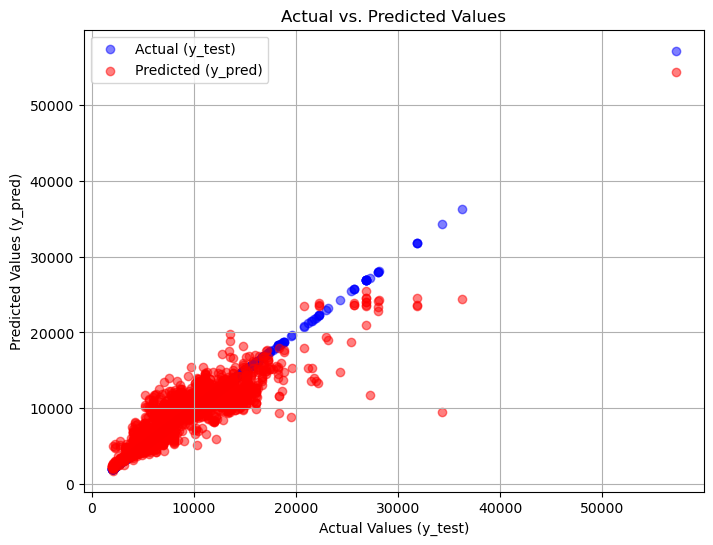

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_predgb, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Insights

Our Random forest model had an initial R-squared (R2) score of 81% before hyperparameter tuning. 
After tuning, the model's score improved to 84%, signifying that the tuned Random forest model explains approximately 84% of the variance in flight fares, marking a substantial improvement in predictive performance compared to the
original model.

# Final Report

In [182]:
scores=[r2,KNR_r2,SVRh_r2,DT_r2_score,RFR_r2_score,r2_score]
algorithms=['LinearRegression','KNN','SVM','DecisionTree','RandomForest','GradientBoosting']
for i in range(len(algorithms)):
    print("The R2 Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The R2 Score acheived using LinearRegression is: 0.5761544150657629%
The R2 Score acheived using KNN is: 0.5265879758539886%
The R2 Score acheived using SVM is: 0.4830904282169065%
The R2 Score acheived using DecisionTree is: 0.7641559979947105%
The R2 Score acheived using RandomForest is: 0.8424013963315617%
The R2 Score acheived using GradientBoosting is: 0.7948939897571761%


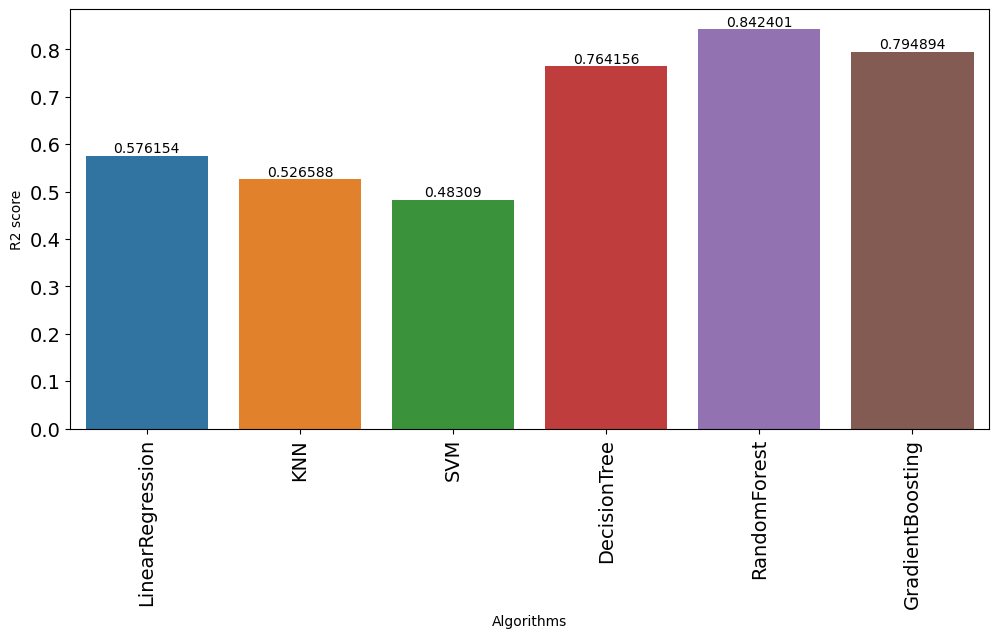

In [183]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=14)

# Conclusion

**Summarize by stating that your Random Forest model, with an 84% R2 score, is a promising solution for your problem. It outperforms other models you've tried and provides valuable insights into the relationship between your features and target variable. However, remember to use this model responsibly and consider its interpretability and practicality in real-world applications.**

### Techniques Used in Flight Fare Prediction:

**Model Selection:**

 Choosing the right machine learning algorithm or ensemble of algorithms can be challenging. Common choices
 for regression tasks like flight fare prediction include XGBoost, Random Forest, and Linear Regression.
 
**Cross-Validation:**

  Cross-validation is used to assess the model's performance and ensure it generalizes well to unseen data. 
  Common techniques include k-fold cross-validation.
  
**Hyperparameter Tuning:**

 Hyperparameter tuning using techniques like grid search or random search helps optimize model parameters 
 to achieve the best performance.
 
**Ensemble Techniques:**

 Ensemble methods such as stacking or blending multiple models (e.g., XGBoost, Random Forest and 
 Gradient Boost) can improve predictive accuracy.
 
**Feature Engineering for Categorical Data:**

 Techniques such as one-hot encoding, label encoding, or target encoding are used to convert 
 categorical variables into a suitable format for modeling.
